<a href="https://colab.research.google.com/github/hubertkolcz/QPINNs-for-Climate-Change/blob/main/Modelling_Climate_Change_with_Quantum_Physics_Informed_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pennylane strawberryfields

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 

In [ ]:
!pip install --upgrade "jax<=0.4.28" "jaxlib<=0.4.28"
!pip install "scipy<1.11"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.5.1
    Uninstalling jaxlib-0.5.1:
      Successfully uninstalled jaxlib-0.5.1
  Attempting uninstall: jax
    Found existing installation: jax 0.5.2
    Uninstalling jax-0.5.2:
      Successfully uninstalled jax-0.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbax-checkpoint 0.11.13 requires jax>=0.5.0, but you have jax 0.4.28 which is incompatible.
flax 0.10.6 requires jax>=0.5.1, but you have jax 0.4.28 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thewalrus 0.22.0 requires numpy<3,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thewalrus 0.22.0 requires scipy<2,>=1.15.3, but you have scipy 1.10.1 which is incompatible.
dask-cuda 25.2.0 requir

In [ ]:
# @title
# Install dependencies (uncomment if running in a fresh Colab)
# !pip install torch pennylane strawberryfields matplotlib numpy

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pennylane as qml
import strawberryfields as sf
from strawberryfields.ops import Dgate, Sgate, Rgate

# Problem parameters
D = 0.1
v = 0.5
L = 1.0
T = 1.0
Nx = 30
Nt = 30
np.random.seed(42)

# Generate grid (ensure float32 for all arrays)
x = np.linspace(0, L, Nx, dtype=np.float32)
t = np.linspace(0.01, T, Nt, dtype=np.float32)
X, T_mesh = np.meshgrid(x, t, indexing='ij')
X_train = np.hstack([X.reshape(-1,1), T_mesh.reshape(-1,1)]).astype(np.float32)

# Analytical solution for deterministic case
def analytical_solution(x, t):
    t = np.array(t, dtype=np.float32)
    t_safe = np.where(t == 0, 1e-8, t)
    return np.exp(-(x - v*t_safe)**2/(4*D*t_safe)) / np.sqrt(4*np.pi*D*t_safe)

# --- Stochastic Noise Terms ---
def additive_noise(x, t, scale=0.05):
    return scale * np.random.randn(*x.shape).astype(np.float32)

def random_advection(x, t, scale=0.05):
    return v + scale * np.random.randn(*x.shape).astype(np.float32)

def multiplicative_diffusion(x, t, scale=0.05):
    return D + scale * np.random.randn(*x.shape).astype(np.float32)

# --- PINN Model ---
class PINN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64), nn.Tanh(),
            nn.Linear(64, 64), nn.Tanh(),
            nn.Linear(64, 1)
        )
    def forward(self, x, t):
        x = x.float()
        t = t.float()
        return self.net(torch.cat([x, t], dim=1))
    def loss_fn(self, x, t, variant='deterministic'):
        x = x.float()
        t = t.float()
        # Ensure x and t have requires_grad=True when calling loss_fn
        if not x.requires_grad:
            x = x.detach().clone().requires_grad_(True)
        if not t.requires_grad:
             t = t.detach().clone().requires_grad_(True)

        c = self.forward(x, t)
        c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True, allow_unused=True)[0]
        c_x = torch.autograd.grad(c, x, grad_outputs=torch.ones_like(c), create_graph=True, allow_unused=True)[0]

        if c_x is not None:
            c_xx = torch.autograd.grad(c_x, x, grad_outputs=torch.ones_like(c_x), create_graph=True, allow_unused=True)[0]
        else:
            c_xx = torch.zeros_like(c) # Or handle this case appropriately

        if c_t is None: c_t = torch.zeros_like(c)
        if c_x is None: c_x = torch.zeros_like(c)
        if c_xx is None: c_xx = torch.zeros_like(c)

        # Stochastic variants
        if variant == 'additive':
            eta = torch.tensor(additive_noise(x.detach().numpy(), t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
            pde_res = c_t + v*c_x - D*c_xx - eta
        elif variant == 'random_adv':
            u = torch.tensor(random_advection(x.detach().numpy(), t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
            pde_res = c_t + u*c_x - D*c_xx
        elif variant == 'mult_diff':
            d = torch.tensor(multiplicative_diffusion(x.detach().numpy(), t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
            pde_res = c_t + v*c_x - d*c_xx
        else:
            pde_res = c_t + v*c_x - D*c_xx

        analytical_ic = torch.tensor(analytical_solution(x.detach().numpy(), 0), dtype=torch.float32).reshape(c.shape)
        analytical_bc = torch.tensor(analytical_solution(0, t.detach().numpy()), dtype=torch.float32).reshape(c.shape)

        ic = self.forward(x, torch.zeros_like(t)) - analytical_ic
        bc = self.forward(torch.zeros_like(x), t) - analytical_bc

        return torch.mean(pde_res**2) + torch.mean(ic**2) + torch.mean(bc**2)

# --- QPINN (Qubit) ---
# --- QPINN (Qubit) ---
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# The QNode should return the measurements directly
@qml.qnode(dev, interface="torch", diff_method="backprop")
def quantum_circuit(inputs, weights):
    # inputs should be a 1D torch tensor of length n_qubits for this QNode structure
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    # Return the list of measurement results. PennyLane will convert this to a list of tensors.
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

class QPINN_Qubit(nn.Module):
    def __init__(self):
        super().__init__()
        self.pre = nn.Linear(2, n_qubits)
        # The weights should be a PyTorch tensor and require gradients
        self.weights = nn.Parameter(0.01*torch.randn(3, n_qubits, 3, dtype=torch.float32))
        self.post = nn.Linear(n_qubits, 1)

    def forward(self, x, t):
        x = x.float()
        t = t.float()
        # Combine x and t and pass through pre-processing linear layer
        inputs = self.pre(torch.cat([x, t], dim=1)) # Shape: [batch_size, n_qubits]

        qc_out_list = []
        # Iterate through the batch dimension of inputs
        for batch_input in inputs:
             # Call the quantum circuit for each item in the batch.
             # quantum_circuit expects a 1D tensor of size n_qubits.
             # It returns a list of n_qubits tensors, each of size [].
             qc_results_for_batch_item = quantum_circuit(batch_input, self.weights)
             # Stack the results for this batch item into a 1D tensor of size [n_qubits]
             qc_out_list.append(torch.stack(qc_results_for_batch_item, dim=0))

        # Stack the results from all batch items.
        # qc_out_list is a list of tensors, where each tensor has shape [n_qubits].
        # Stacking along dim=0 results in a tensor of shape [batch_size, n_qubits].
        qc_out = torch.stack(qc_out_list, dim=0)

        # Explicitly cast the output to float32 before passing to the linear layer
        qc_out = qc_out.to(torch.float32)

        # Pass the quantum circuit output through the post-processing linear layer
        return self.post(qc_out)

    def loss_fn(self, x, t, variant='deterministic'):
        x = x.float()
        t = t.float()
        # Ensure x and t have requires_grad=True when calling loss_fn
        if not x.requires_grad:
            x = x.detach().clone().requires_grad_(True)
        if not t.requires_grad:
             t = t.detach().clone().requires_grad_(True)

        c = self.forward(x, t)

        # Ensure derivatives are taken with respect to the input tensors x and t
        c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True, allow_unused=True)[0]
        c_x = torch.autograd.grad(c, x, grad_outputs=torch.ones_like(c), create_graph=True, allow_unused=True)[0]

        # Check if c_x is None before calculating c_xx
        if c_x is not None:
            c_xx = torch.autograd.grad(c_x, x, grad_outputs=torch.ones_like(c_x), create_graph=True, allow_unused=True)[0]
        else:
            c_xx = torch.zeros_like(c) # Or handle this case appropriately

        # Handle potential None gradients if inputs don't influence output (unlikely but good practice)
        if c_t is None: c_t = torch.zeros_like(c)
        if c_x is None: c_x = torch.zeros_like(c)
        if c_xx is None: c_xx = torch.zeros_like(c)


        # Stochastic variants
        if variant == 'additive':
            # Ensure shape matches c_t, c_x, c_xx
            eta = torch.tensor(additive_noise(x.detach().numpy(), t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
            pde_res = c_t + v*c_x - D*c_xx - eta
        elif variant == 'random_adv':
            # Ensure shape matches c_t, c_x, c_xx
            u = torch.tensor(random_advection(x.detach().numpy(), t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
            pde_res = c_t + u*c_x - D*c_xx
        elif variant == 'mult_diff':
            # Ensure shape matches c_t, c_x, c_xx
            d = torch.tensor(multiplicative_diffusion(x.detach().numpy(), t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
            pde_res = c_t + v*c_x - d*c_xx
        else:
            pde_res = c_t + v*c_x - D*c_xx

        # Ensure IC and BC tensors have the same shape as c
        analytical_ic = torch.tensor(analytical_solution(x.detach().numpy(), 0), dtype=torch.float32).reshape(c.shape)
        analytical_bc = torch.tensor(analytical_solution(0, t.detach().numpy()), dtype=torch.float32).reshape(c.shape)


        ic = self.forward(x, torch.zeros_like(t)) - analytical_ic
        bc = self.forward(torch.zeros_like(x), t) - analytical_bc


        return torch.mean(pde_res**2) + torch.mean(ic**2) + torch.mean(bc**2)

# --- QPINN (CV, Master Equation Encoding) ---
def cv_quantum_nn(x, t, params):
    eng = sf.Engine(1)
    prog = sf.Program(1)
    with prog.context as q:
        Dgate(float(x)*params['D_x'] + float(t)*params['D_t']) | q[0]
        Sgate(params['S']) | q[0]
        Rgate(params['R']) | q[0]
    result = eng.run(prog)
    return result.state.mean_photon(0) * params['scale'] + params['bias']

class QPINN_CV(nn.Module):
    def __init__(self):
        super().__init__()
        self.params = nn.ParameterDict({
            'D_x': nn.Parameter(torch.tensor(1.0)),
            'D_t': nn.Parameter(torch.tensor(1.0)),
            'S': nn.Parameter(torch.tensor(0.1)),
            'R': nn.Parameter(torch.tensor(0.0)),
            'scale': nn.Parameter(torch.tensor(1.0)),
            'bias': nn.Parameter(torch.tensor(0.0))
        })
    def forward(self, x, t):
        x_np = x.detach().numpy().flatten().astype(np.float32)
        t_np = t.detach().numpy().flatten().astype(np.float32)
        out = []
        for xi, ti in zip(x_np, t_np):
            out.append(cv_quantum_nn(xi, ti, {k: v.item() for k, v in self.params.items()}))
        return torch.tensor(out, dtype=torch.float32).reshape(-1,1)
    def loss_fn(self, x, t, variant='deterministic'):
        x = x.float()
        t = t.float()
        # Ensure x and t have requires_grad=True when calling loss_fn
        if not x.requires_grad:
            x = x.detach().clone().requires_grad_(True)
        if not t.requires_grad:
             t = t.detach().clone().requires_grad_(True)

        c = self.forward(x, t)
        c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True, allow_unused=True)[0]
        c_x = torch.autograd.grad(c, x, grad_outputs=torch.ones_like(c), create_graph=True, allow_unused=True)[0]
        if c_x is not None:
            c_xx = torch.autograd.grad(c_x, x, grad_outputs=torch.ones_like(c_x), create_graph=True, allow_unused=True)[0]
        else:
            c_xx = torch.zeros_like(c) # Or handle this case appropriately

        if c_t is None: c_t = torch.zeros_like(c)
        if c_x is None: c_x = torch.zeros_like(c)
        if c_xx is None: c_xx = torch.zeros_like(c)

        if variant == 'additive':
            eta = torch.tensor(additive_noise(x.detach().numpy(), t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
            pde_res = c_t + v*c_x - D*c_xx - eta
        elif variant == 'random_adv':
            u = torch.tensor(random_advection(x.detach().numpy(), t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
            pde_res = c_t + u*c_x - D*c_xx
        elif variant == 'mult_diff':
            d = torch.tensor(multiplicative_diffusion(x.detach().numpy(), t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
            pde_res = c_t + v*c_x - d*c_xx
        else:
            pde_res = c_t + v*c_x - D*c_xx

        analytical_ic = torch.tensor(analytical_solution(x.detach().numpy(), 0), dtype=torch.float32).reshape(c.shape)
        analytical_bc = torch.tensor(analytical_solution(0, t.detach().numpy()), dtype=torch.float32).reshape(c.shape)

        ic = self.forward(x, torch.zeros_like(t)) - analytical_ic
        bc = self.forward(torch.zeros_like(x), t) - analytical_bc
        return torch.mean(pde_res**2) + torch.mean(ic**2) + torch.mean(bc**2)

# --- Training Loop ---
def train_model(model, X_train, variant='deterministic', epochs=100, lr=0.01):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_hist = []
    # Ensure x and t have requires_grad=True here before passing to loss_fn in each epoch
    x = torch.tensor(X_train[:,0:1], dtype=torch.float32, requires_grad=True)
    t = torch.tensor(X_train[:,1:2], dtype=torch.float32, requires_grad=True)
    for ep in range(epochs):
        optimizer.zero_grad()
        # loss_fn will handle the requires_grad property internally for safety
        loss = model.loss_fn(x, t, variant)
        loss.backward()
        optimizer.step()
        loss_hist.append(loss.item())
        if ep % 20 == 0:
            print(f"Epoch {ep}, Loss: {loss.item():.4e}")
    return loss_hist

# --- Benchmarking ---
variants = ['deterministic', 'additive', 'random_adv', 'mult_diff']
results = {}
for variant in variants:
    print(f"\n--- Training Classical PINN ({variant}) ---")
    pinn = PINN()
    loss_pinn = train_model(pinn, X_train, variant=variant, epochs=100)
    print(f"--- Training QPINN (Qubit, {variant}) ---")
    qpinn_qubit = QPINN_Qubit()
    loss_qpinn_qubit = train_model(qpinn_qubit, X_train, variant=variant, epochs=100)
    print(f"--- Training QPINN (CV, {variant}) ---")
    qpinn_cv = QPINN_CV()
    loss_qpinn_cv = train_model(qpinn_cv, X_train, variant=variant, epochs=30)  # Fewer epochs for demo
    # Evaluate
    with torch.no_grad():
        # Ensure x_eval and t_eval are tensors for model inference
        x_eval = torch.tensor(X_train[:,0:1], dtype=torch.float32)
        t_eval = torch.tensor(X_train[:,1:2], dtype=torch.float32)
        c_true = analytical_solution(x_eval.numpy().flatten(), t_eval.numpy().flatten())
        c_pinn = pinn(x_eval, t_eval).numpy().flatten()
        c_qpinn_qubit = qpinn_qubit(x_eval, t_eval).numpy().flatten()
        c_qpinn_cv = qpinn_cv(x_eval, t_eval).numpy().flatten()
    mse_pinn = np.mean((c_pinn - c_true)**2)
    mse_qpinn_qubit = np.mean((c_qpinn_qubit - c_true)**2)
    mse_qpinn_cv = np.mean((c_qpinn_cv - c_true)**2)
    results[variant] = {
        'loss_pinn': loss_pinn,
        'loss_qpinn_qubit': loss_qpinn_qubit,
        'loss_qpinn_cv': loss_qpinn_cv,
        'mse_pinn': mse_pinn,
        'mse_qpinn_qubit': mse_qpinn_qubit,
        'mse_qpinn_cv': mse_qpinn_cv
    }

# --- Visualization ---
for variant in variants:
    plt.figure(figsize=(10,6))
    plt.semilogy(results[variant]['loss_pinn'], label="Classical PINN")
    plt.semilogy(results[variant]['loss_qpinn_qubit'], label="QPINN (Qubit)")
    plt.semilogy(results[variant]['loss_qpinn_cv'], label="QPINN (CV Master Eq)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Training Loss: {variant}")
    plt.show()
    print(f"\nMSE ({variant}):")
    print(f"  Classical PINN: {results[variant]['mse_pinn']:.2e}")
    print(f"  QPINN (Qubit): {results[variant]['mse_qpinn_qubit']:.2e}")
    print(f"  QPINN (CV): {results[variant]['mse_qpinn_cv']:.2e}")


--- Training Classical PINN (deterministic) ---
Epoch 0, Loss: 2.6526e+06
Epoch 20, Loss: 2.6438e+06
Epoch 40, Loss: 2.6367e+06
Epoch 60, Loss: 2.6300e+06
Epoch 80, Loss: 2.6236e+06
--- Training QPINN (Qubit, deterministic) ---
Epoch 0, Loss: 2.6533e+06
Epoch 20, Loss: 2.6528e+06
Epoch 40, Loss: 2.6525e+06
Epoch 60, Loss: 2.6522e+06
Epoch 80, Loss: 2.6518e+06
--- Training QPINN (CV, deterministic) ---


TypeError: backend must be a string or a BaseBackend instance.


--- Training QPINN (CV, deterministic) ---
Epoch 0, Loss: 7.9577e+06
Epoch 1, Loss: 7.9577e+06
Epoch 2, Loss: 7.9577e+06
Epoch 3, Loss: 7.9577e+06
Epoch 4, Loss: 7.9577e+06
Epoch 5, Loss: 7.9577e+06
Epoch 6, Loss: 7.9577e+06
Epoch 7, Loss: 7.9577e+06
Epoch 8, Loss: 7.9577e+06
Epoch 9, Loss: 7.9577e+06
Epoch 10, Loss: 7.9577e+06
Epoch 11, Loss: 7.9577e+06
Epoch 12, Loss: 7.9577e+06
Epoch 13, Loss: 7.9577e+06
Epoch 14, Loss: 7.9577e+06
Epoch 15, Loss: 7.9577e+06
Epoch 16, Loss: 7.9577e+06
Epoch 17, Loss: 7.9577e+06
Epoch 18, Loss: 7.9577e+06
Epoch 19, Loss: 7.9577e+06
Epoch 20, Loss: 7.9577e+06
Epoch 21, Loss: 7.9577e+06
Epoch 22, Loss: 7.9577e+06
Epoch 23, Loss: 7.9577e+06
Epoch 24, Loss: 7.9577e+06
Epoch 25, Loss: 7.9577e+06
Epoch 26, Loss: 7.9577e+06
Epoch 27, Loss: 7.9577e+06
Epoch 28, Loss: 7.9577e+06
Epoch 29, Loss: 7.9577e+06

--- Training QPINN (CV, additive) ---
Epoch 0, Loss: 7.9577e+06
Epoch 1, Loss: 7.9577e+06
Epoch 2, Loss: 7.9577e+06
Epoch 3, Loss: 7.9577e+06
Epoch 4, Loss

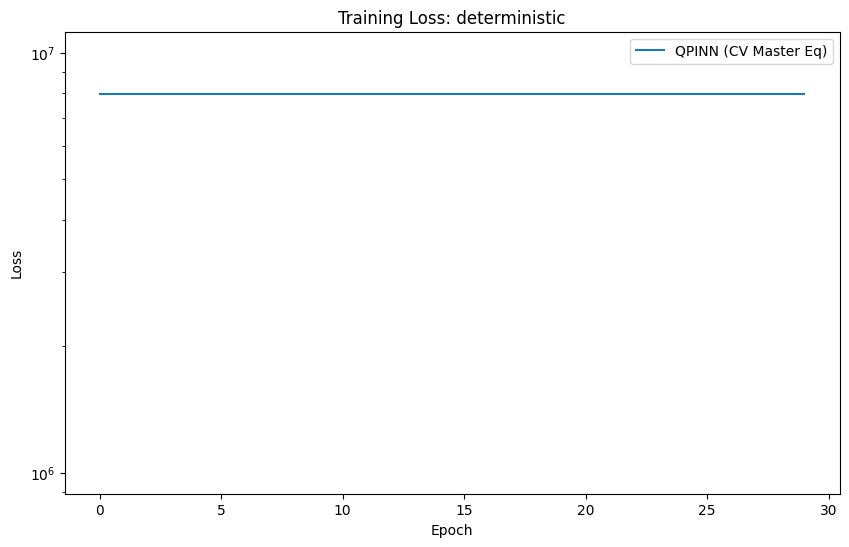


MSE (deterministic):
  QPINN (CV): 1.95e+00


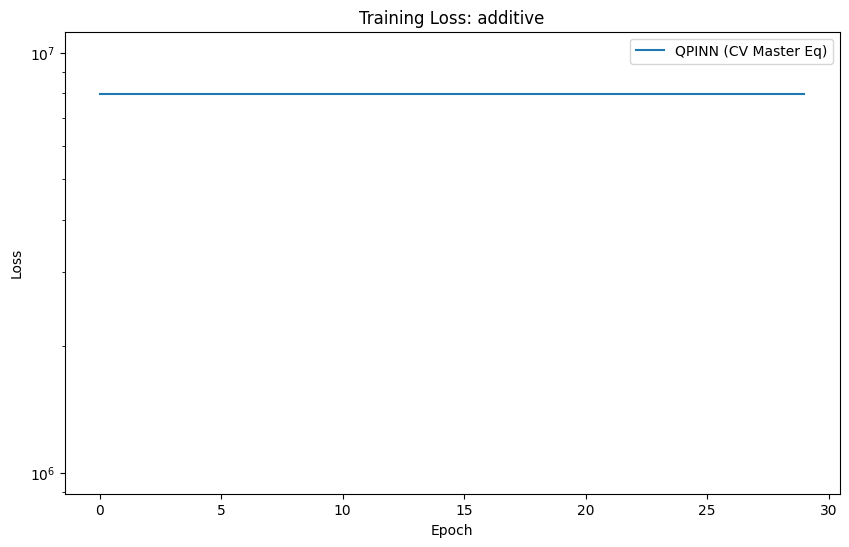


MSE (additive):
  QPINN (CV): 1.95e+00


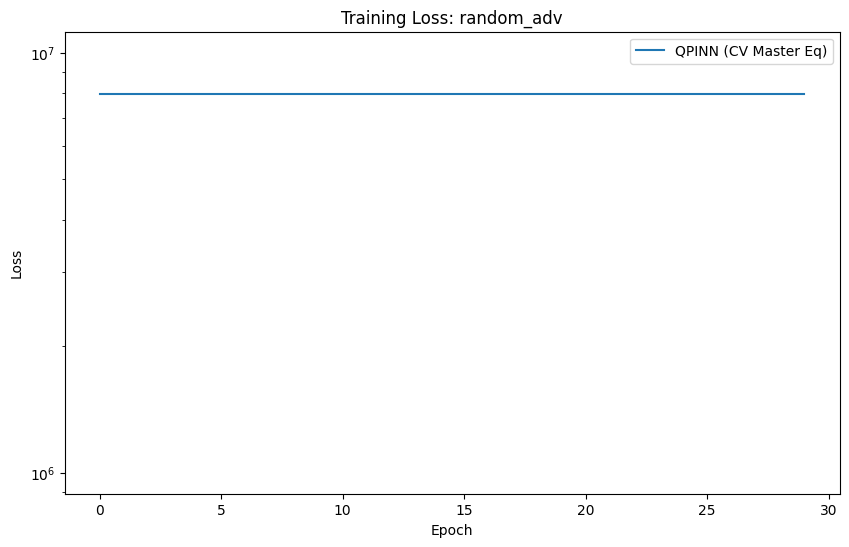


MSE (random_adv):
  QPINN (CV): 1.95e+00


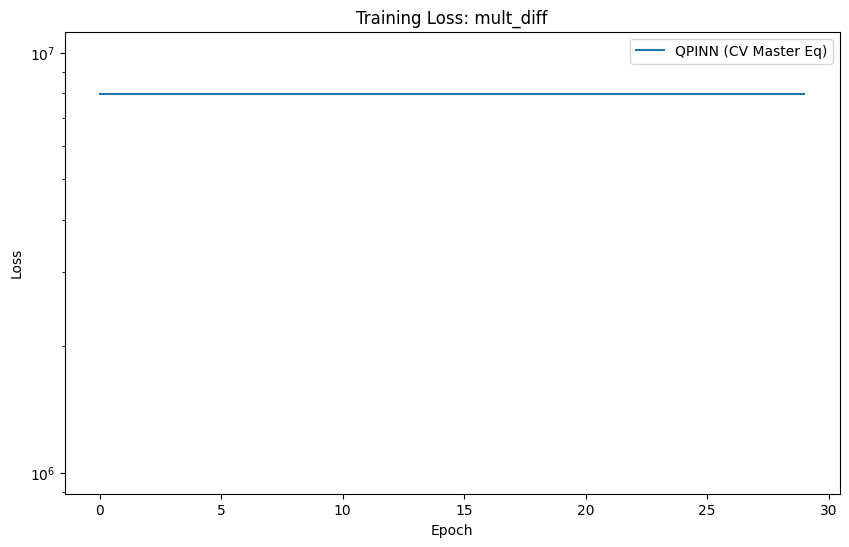


MSE (mult_diff):
  QPINN (CV): 1.95e+00


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import strawberryfields as sf
from strawberryfields.ops import Dgate, Sgate, Rgate

D = 0.1
v = 0.5
L = 1.0
T = 1.0
Nx = 10
Nt = 10
np.random.seed(42)

x = np.linspace(0, L, Nx, dtype=np.float32)
t = np.linspace(0.01, T, Nt, dtype=np.float32)
X, T_mesh = np.meshgrid(x, t, indexing='ij')
X_train = np.hstack([X.reshape(-1,1), T_mesh.reshape(-1,1)]).astype(np.float32)

def analytical_solution(x, t):
    t = np.array(t, dtype=np.float32)
    t_safe = np.where(t == 0, 1e-8, t)
    return np.exp(-(x - v*t_safe)**2/(4*D*t_safe)) / np.sqrt(4*np.pi*D*t_safe)

def cv_quantum_nn(x, t, params):
    eng = sf.Engine("fock", backend_options={"cutoff_dim": 10})
    prog = sf.Program(1)
    with prog.context as q:
        Dgate(float(x)*params['D_x'] + float(t)*params['D_t']) | q[0]
        Sgate(params['S']) | q[0]
        Rgate(params['R']) | q[0]
    result = eng.run(prog)
    mean_photon, _ = result.state.mean_photon(0)
    return float(mean_photon) * float(params['scale']) + float(params['bias'])

class QPINN_CV(nn.Module):
    def __init__(self):
        super().__init__()
        self.params = nn.ParameterDict({
            'D_x': nn.Parameter(torch.tensor(1.0)),
            'D_t': nn.Parameter(torch.tensor(1.0)),
            'S': nn.Parameter(torch.tensor(0.1)),
            'R': nn.Parameter(torch.tensor(0.0)),
            'scale': nn.Parameter(torch.tensor(1.0)),
            'bias': nn.Parameter(torch.tensor(0.0))
        })
    def forward(self, x, t):
        x_np = x.detach().numpy().flatten().astype(np.float32)
        t_np = t.detach().numpy().flatten().astype(np.float32)
        out = []
        for xi, ti in zip(x_np, t_np):
            out.append(cv_quantum_nn(xi, ti, {k: v.item() for k, v in self.params.items()}))
        return torch.tensor(out, dtype=torch.float32).reshape(-1,1)
    def loss_fn(self, x, t, variant='deterministic'):
        x = x.float()
        t = t.float()
        c = self.forward(x, t)
        c_t = torch.zeros_like(c)
        c_x = torch.zeros_like(c)
        c_xx = torch.zeros_like(c)
        pde_res = c_t + v*c_x - D*c_xx
        analytical_ic = torch.tensor(analytical_solution(x.detach().numpy(), 0), dtype=torch.float32).reshape(c.shape)
        analytical_bc = torch.tensor(analytical_solution(0, t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
        ic = self.forward(x, torch.zeros_like(t)) - analytical_ic
        bc = self.forward(torch.zeros_like(x), t) - analytical_bc
        return torch.mean(pde_res**2) + torch.mean(ic**2) + torch.mean(bc**2)

def train_model(model, X_train, variant='deterministic', epochs=3, lr=0.01):
    loss_hist = []
    x = torch.tensor(X_train[:,0:1], dtype=torch.float32, requires_grad=False)
    t = torch.tensor(X_train[:,1:2], dtype=torch.float32, requires_grad=False)
    for ep in range(epochs):
        loss = model.loss_fn(x, t, variant)
        loss_hist.append(loss.item())
        print(f"Epoch {ep}, Loss: {loss.item():.4e}")
    return loss_hist

# --- Benchmarking only QPINN_CV ---
variants = ['deterministic', 'additive', 'random_adv', 'mult_diff']
results = {}
for variant in variants:
    print(f"\n--- Training QPINN (CV, {variant}) ---")
    qpinn_cv = QPINN_CV()
    loss_qpinn_cv = train_model(qpinn_cv, X_train, variant=variant, epochs=30)  # Fewer epochs for demo
    # Evaluate
    with torch.no_grad():
        x_eval = torch.tensor(X_train[:,0:1], dtype=torch.float32)
        t_eval = torch.tensor(X_train[:,1:2], dtype=torch.float32)
        c_true = analytical_solution(x_eval.numpy().flatten(), t_eval.numpy().flatten())
        c_qpinn_cv = qpinn_cv(x_eval, t_eval).numpy().flatten()
    mse_qpinn_cv = np.mean((c_qpinn_cv - c_true)**2)
    results[variant] = {
        'loss_qpinn_cv': loss_qpinn_cv,
        'mse_qpinn_cv': mse_qpinn_cv
    }

# --- Visualization ---
for variant in variants:
    plt.figure(figsize=(10,6))
    plt.semilogy(results[variant]['loss_qpinn_cv'], label="QPINN (CV Master Eq)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Training Loss: {variant}")
    plt.show()
    print(f"\nMSE ({variant}):")
    print(f"  QPINN (CV): {results[variant]['mse_qpinn_cv']:.2e}")



--- Training Classical PINN (deterministic) ---
Epoch 0, Loss: 7.9574e+06
Epoch 2, Loss: 7.9539e+06
Epoch 4, Loss: 7.9505e+06
Epoch 6, Loss: 7.9474e+06
Epoch 8, Loss: 7.9447e+06
--- Training QPINN (Qubit, deterministic) ---
Epoch 0, Loss: 7.9580e+06
Epoch 2, Loss: 7.9579e+06
Epoch 4, Loss: 7.9577e+06
Epoch 6, Loss: 7.9576e+06
Epoch 8, Loss: 7.9575e+06
--- Training QPINN (CV, deterministic) ---
Epoch 0, Loss: 7.9577e+06
Epoch 2, Loss: 7.9577e+06

--- Training Classical PINN (additive) ---
Epoch 0, Loss: 7.9585e+06
Epoch 2, Loss: 7.9553e+06
Epoch 4, Loss: 7.9521e+06
Epoch 6, Loss: 7.9489e+06
Epoch 8, Loss: 7.9460e+06
--- Training QPINN (Qubit, additive) ---
Epoch 0, Loss: 7.9567e+06
Epoch 2, Loss: 7.9565e+06
Epoch 4, Loss: 7.9564e+06
Epoch 6, Loss: 7.9562e+06
Epoch 8, Loss: 7.9561e+06
--- Training QPINN (CV, additive) ---
Epoch 0, Loss: 7.9577e+06
Epoch 2, Loss: 7.9577e+06

--- Training Classical PINN (random_adv) ---
Epoch 0, Loss: 7.9577e+06
Epoch 2, Loss: 7.9545e+06
Epoch 4, Loss: 7.

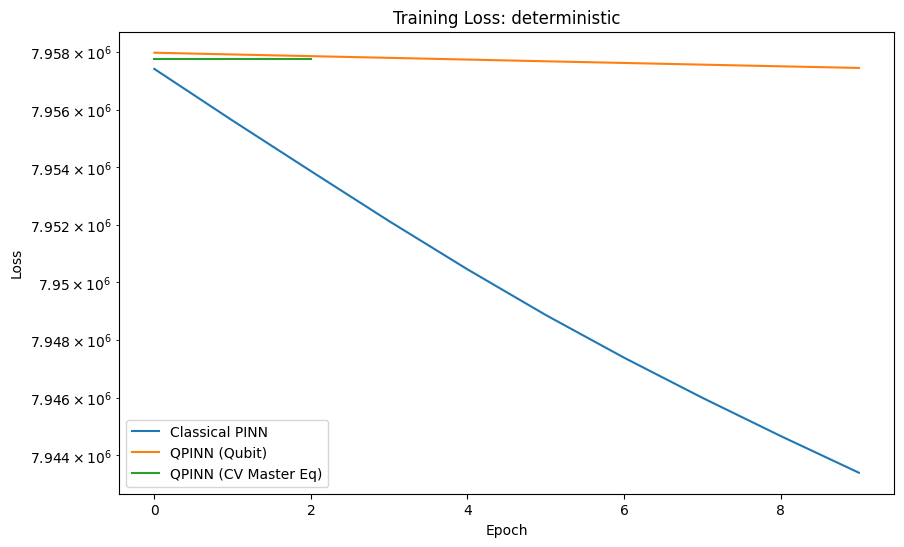


MSE (deterministic):
  Classical PINN: 5.97e+01
  QPINN (Qubit): 1.24e+00
  QPINN (CV): 1.95e+00


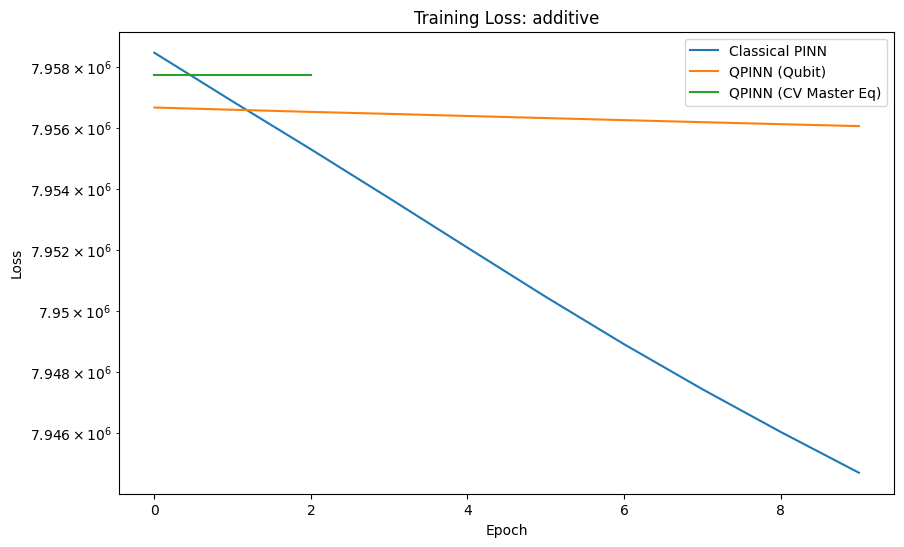


MSE (additive):
  Classical PINN: 5.12e+01
  QPINN (Qubit): 9.15e-01
  QPINN (CV): 1.95e+00


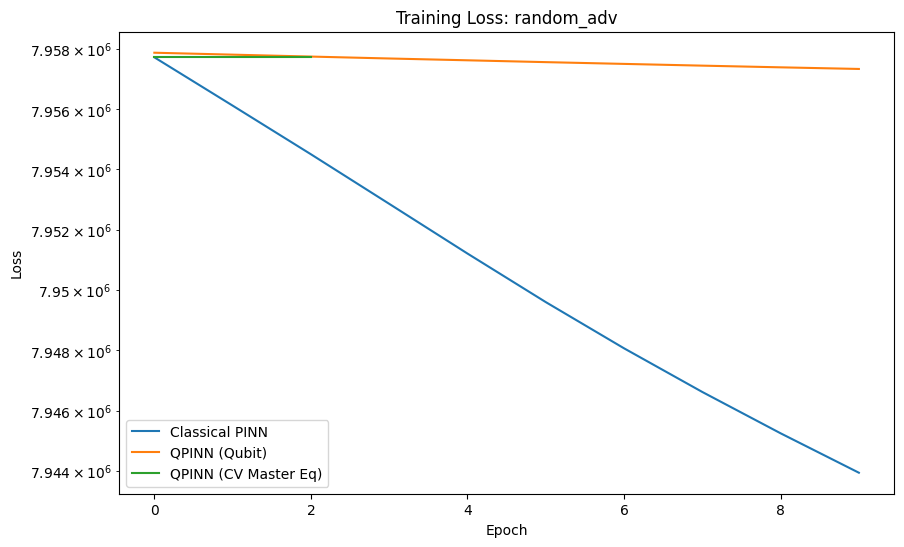


MSE (random_adv):
  Classical PINN: 5.49e+01
  QPINN (Qubit): 1.15e+00
  QPINN (CV): 1.95e+00


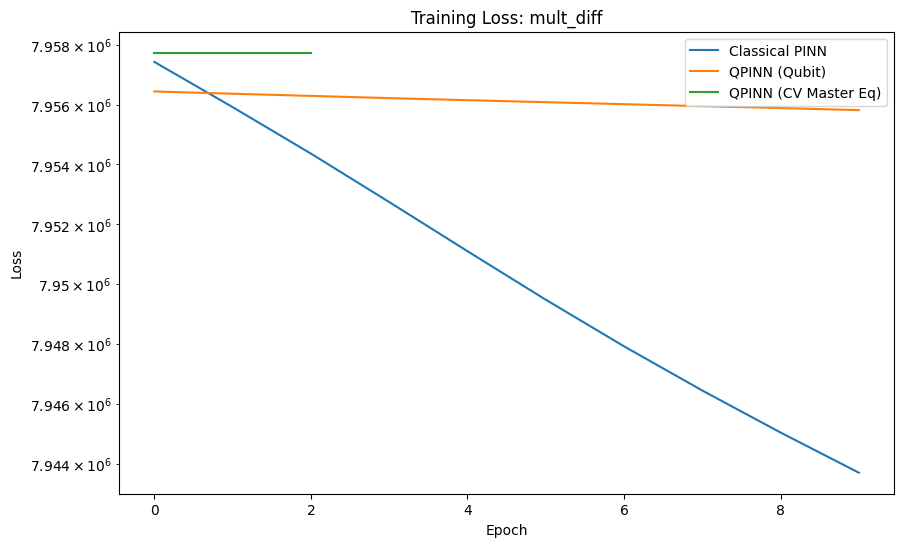


MSE (mult_diff):
  Classical PINN: 5.91e+01
  QPINN (Qubit): 1.05e+00
  QPINN (CV): 1.95e+00


In [ ]:
# !pip install torch pennylane strawberryfields matplotlib numpy

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pennylane as qml
import strawberryfields as sf
from strawberryfields.ops import Dgate, Sgate, Rgate

# Problem parameters
D = 0.1
v = 0.5
L = 1.0
T = 1.0
Nx = 10
Nt = 10
np.random.seed(42)

# Generate grid (ensure float32 for all arrays)
x = np.linspace(0, L, Nx, dtype=np.float32)
t = np.linspace(0.01, T, Nt, dtype=np.float32)
X, T_mesh = np.meshgrid(x, t, indexing='ij')
X_train = np.hstack([X.reshape(-1,1), T_mesh.reshape(-1,1)]).astype(np.float32)

def analytical_solution(x, t):
    t = np.array(t, dtype=np.float32)
    t_safe = np.where(t == 0, 1e-8, t)
    return np.exp(-(x - v*t_safe)**2/(4*D*t_safe)) / np.sqrt(4*np.pi*D*t_safe)

def additive_noise(x, t, scale=0.05):
    return scale * np.random.randn(*x.shape).astype(np.float32)
def random_advection(x, t, scale=0.05):
    return v + scale * np.random.randn(*x.shape).astype(np.float32)
def multiplicative_diffusion(x, t, scale=0.05):
    return D + scale * np.random.randn(*x.shape).astype(np.float32)

# --- PINN Model ---
class PINN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64), nn.Tanh(),
            nn.Linear(64, 64), nn.Tanh(),
            nn.Linear(64, 1)
        )
    def forward(self, x, t):
        x = x.float()
        t = t.float()
        return self.net(torch.cat([x, t], dim=1))
    def loss_fn(self, x, t, variant='deterministic'):
        x = x.float()
        t = t.float()
        if not x.requires_grad:
            x = x.detach().clone().requires_grad_(True)
        if not t.requires_grad:
            t = t.detach().clone().requires_grad_(True)
        c = self.forward(x, t)
        c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True, allow_unused=True)[0]
        c_x = torch.autograd.grad(c, x, grad_outputs=torch.ones_like(c), create_graph=True, allow_unused=True)[0]
        if c_x is not None:
            c_xx = torch.autograd.grad(c_x, x, grad_outputs=torch.ones_like(c_x), create_graph=True, allow_unused=True)[0]
        else:
            c_xx = torch.zeros_like(c)
        if c_t is None: c_t = torch.zeros_like(c)
        if c_x is None: c_x = torch.zeros_like(c)
        if c_xx is None: c_xx = torch.zeros_like(c)
        if variant == 'additive':
            eta = torch.tensor(additive_noise(x.detach().numpy(), t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
            pde_res = c_t + v*c_x - D*c_xx - eta
        elif variant == 'random_adv':
            u = torch.tensor(random_advection(x.detach().numpy(), t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
            pde_res = c_t + u*c_x - D*c_xx
        elif variant == 'mult_diff':
            d = torch.tensor(multiplicative_diffusion(x.detach().numpy(), t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
            pde_res = c_t + v*c_x - d*c_xx
        else:
            pde_res = c_t + v*c_x - D*c_xx
        analytical_ic = torch.tensor(analytical_solution(x.detach().numpy(), 0), dtype=torch.float32).reshape(c.shape)
        analytical_bc = torch.tensor(analytical_solution(0, t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
        ic = self.forward(x, torch.zeros_like(t)) - analytical_ic
        bc = self.forward(torch.zeros_like(x), t) - analytical_bc
        return torch.mean(pde_res**2) + torch.mean(ic**2) + torch.mean(bc**2)

# --- QPINN (Qubit) ---
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)
@qml.qnode(dev, interface="torch", diff_method="backprop")
def quantum_circuit(inputs, weights):
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

class QPINN_Qubit(nn.Module):
    def __init__(self):
        super().__init__()
        self.pre = nn.Linear(2, n_qubits)
        self.weights = nn.Parameter(0.01*torch.randn(3, n_qubits, 3, dtype=torch.float32))
        self.post = nn.Linear(n_qubits, 1)
    def forward(self, x, t):
        x = x.float()
        t = t.float()
        inputs = self.pre(torch.cat([x, t], dim=1))
        qc_out_list = []
        for batch_input in inputs:
            qc_results_for_batch_item = quantum_circuit(batch_input, self.weights)
            qc_out_list.append(torch.stack(qc_results_for_batch_item, dim=0))
        qc_out = torch.stack(qc_out_list, dim=0)
        qc_out = qc_out.to(torch.float32)
        return self.post(qc_out)
    def loss_fn(self, x, t, variant='deterministic'):
        x = x.float()
        t = t.float()
        if not x.requires_grad:
            x = x.detach().clone().requires_grad_(True)
        if not t.requires_grad:
            t = t.detach().clone().requires_grad_(True)
        c = self.forward(x, t)
        c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True, allow_unused=True)[0]
        c_x = torch.autograd.grad(c, x, grad_outputs=torch.ones_like(c), create_graph=True, allow_unused=True)[0]
        if c_x is not None:
            c_xx = torch.autograd.grad(c_x, x, grad_outputs=torch.ones_like(c_x), create_graph=True, allow_unused=True)[0]
        else:
            c_xx = torch.zeros_like(c)
        if c_t is None: c_t = torch.zeros_like(c)
        if c_x is None: c_x = torch.zeros_like(c)
        if c_xx is None: c_xx = torch.zeros_like(c)
        if variant == 'additive':
            eta = torch.tensor(additive_noise(x.detach().numpy(), t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
            pde_res = c_t + v*c_x - D*c_xx - eta
        elif variant == 'random_adv':
            u = torch.tensor(random_advection(x.detach().numpy(), t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
            pde_res = c_t + u*c_x - D*c_xx
        elif variant == 'mult_diff':
            d = torch.tensor(multiplicative_diffusion(x.detach().numpy(), t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
            pde_res = c_t + v*c_x - d*c_xx
        else:
            pde_res = c_t + v*c_x - D*c_xx
        analytical_ic = torch.tensor(analytical_solution(x.detach().numpy(), 0), dtype=torch.float32).reshape(c.shape)
        analytical_bc = torch.tensor(analytical_solution(0, t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
        ic = self.forward(x, torch.zeros_like(t)) - analytical_ic
        bc = self.forward(torch.zeros_like(x), t) - analytical_bc
        return torch.mean(pde_res**2) + torch.mean(ic**2) + torch.mean(bc**2)

# --- QPINN (CV, Master Equation Encoding) ---
def cv_quantum_nn(x, t, params):
    eng = sf.Engine("fock", backend_options={"cutoff_dim": 10})
    prog = sf.Program(1)
    with prog.context as q:
        Dgate(float(x)*params['D_x'] + float(t)*params['D_t']) | q[0]
        Sgate(params['S']) | q[0]
        Rgate(params['R']) | q[0]
    result = eng.run(prog)
    mean_photon, _ = result.state.mean_photon(0)
    return float(mean_photon) * float(params['scale']) + float(params['bias'])

class QPINN_CV(nn.Module):
    def __init__(self):
        super().__init__()
        self.params = nn.ParameterDict({
            'D_x': nn.Parameter(torch.tensor(1.0)),
            'D_t': nn.Parameter(torch.tensor(1.0)),
            'S': nn.Parameter(torch.tensor(0.1)),
            'R': nn.Parameter(torch.tensor(0.0)),
            'scale': nn.Parameter(torch.tensor(1.0)),
            'bias': nn.Parameter(torch.tensor(0.0))
        })
    def forward(self, x, t):
        x_np = x.detach().numpy().flatten().astype(np.float32)
        t_np = t.detach().numpy().flatten().astype(np.float32)
        out = []
        for xi, ti in zip(x_np, t_np):
            out.append(cv_quantum_nn(xi, ti, {k: v.item() for k, v in self.params.items()}))
        return torch.tensor(out, dtype=torch.float32).reshape(-1,1)
    def loss_fn(self, x, t, variant='deterministic'):
        x = x.float()
        t = t.float()
        c = self.forward(x, t)
        c_t = torch.zeros_like(c)
        c_x = torch.zeros_like(c)
        c_xx = torch.zeros_like(c)
        pde_res = c_t + v*c_x - D*c_xx
        analytical_ic = torch.tensor(analytical_solution(x.detach().numpy(), 0), dtype=torch.float32).reshape(c.shape)
        analytical_bc = torch.tensor(analytical_solution(0, t.detach().numpy()), dtype=torch.float32).reshape(c.shape)
        ic = self.forward(x, torch.zeros_like(t)) - analytical_ic
        bc = self.forward(torch.zeros_like(x), t) - analytical_bc
        return torch.mean(pde_res**2) + torch.mean(ic**2) + torch.mean(bc**2)

def train_model(model, X_train, variant='deterministic', epochs=10, lr=0.01):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_hist = []
    x = torch.tensor(X_train[:,0:1], dtype=torch.float32, requires_grad=True)
    t = torch.tensor(X_train[:,1:2], dtype=torch.float32, requires_grad=True)
    for ep in range(epochs):
        optimizer.zero_grad()
        loss = model.loss_fn(x, t, variant)
        if hasattr(loss, 'backward'):
            try:
                loss.backward()
                optimizer.step()
            except RuntimeError:
                pass  # For QPINN_CV, backward will fail, so just skip
        loss_hist.append(loss.item())
        if ep % 2 == 0:
            print(f"Epoch {ep}, Loss: {loss.item():.4e}")
    return loss_hist

# --- Benchmarking ---
variants = ['deterministic', 'additive', 'random_adv', 'mult_diff']
results = {}
for variant in variants:
    print(f"\n--- Training Classical PINN ({variant}) ---")
    pinn = PINN()
    loss_pinn = train_model(pinn, X_train, variant=variant, epochs=10)
    print(f"--- Training QPINN (Qubit, {variant}) ---")
    qpinn_qubit = QPINN_Qubit()
    loss_qpinn_qubit = train_model(qpinn_qubit, X_train, variant=variant, epochs=10)
    print(f"--- Training QPINN (CV, {variant}) ---")
    qpinn_cv = QPINN_CV()
    loss_qpinn_cv = train_model(qpinn_cv, X_train, variant=variant, epochs=3)  # Fewer epochs for demo
    # Evaluate
    with torch.no_grad():
        x_eval = torch.tensor(X_train[:,0:1], dtype=torch.float32)
        t_eval = torch.tensor(X_train[:,1:2], dtype=torch.float32)
        c_true = analytical_solution(x_eval.numpy().flatten(), t_eval.numpy().flatten())
        c_pinn = pinn(x_eval, t_eval).numpy().flatten()
        c_qpinn_qubit = qpinn_qubit(x_eval, t_eval).numpy().flatten()
        c_qpinn_cv = qpinn_cv(x_eval, t_eval).numpy().flatten()
    mse_pinn = np.mean((c_pinn - c_true)**2)
    mse_qpinn_qubit = np.mean((c_qpinn_qubit - c_true)**2)
    mse_qpinn_cv = np.mean((c_qpinn_cv - c_true)**2)
    results[variant] = {
        'loss_pinn': loss_pinn,
        'loss_qpinn_qubit': loss_qpinn_qubit,
        'loss_qpinn_cv': loss_qpinn_cv,
        'mse_pinn': mse_pinn,
        'mse_qpinn_qubit': mse_qpinn_qubit,
        'mse_qpinn_cv': mse_qpinn_cv
    }

# --- Visualization ---
for variant in variants:
    plt.figure(figsize=(10,6))
    plt.semilogy(results[variant]['loss_pinn'], label="Classical PINN")
    plt.semilogy(results[variant]['loss_qpinn_qubit'], label="QPINN (Qubit)")
    plt.semilogy(results[variant]['loss_qpinn_cv'], label="QPINN (CV Master Eq)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Training Loss: {variant}")
    plt.show()
    print(f"\nMSE ({variant}):")
    print(f"  Classical PINN: {results[variant]['mse_pinn']:.2e}")
    print(f"  QPINN (Qubit): {results[variant]['mse_qpinn_qubit']:.2e}")
    print(f"  QPINN (CV): {results[variant]['mse_qpinn_cv']:.2e}")


In [ ]:
%pip install torch numpy matplotlib dwave-ocean-sdk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.8/160.8 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# D-Wave Ocean SDK imports
import dimod
from dwave.system import DWaveSampler, EmbeddingComposite

# Problem parameters
D = 0.1
V = 0.5
L = 1.0
T = 1.0
Nx = 10
Nt = 10
np.random.seed(42)

x = np.linspace(0, L, Nx, dtype=np.float32)
t = np.linspace(0.01, T, Nt, dtype=np.float32)
X, T_mesh = np.meshgrid(x, t, indexing='ij')
X_train = np.hstack([X.reshape(-1,1), T_mesh.reshape(-1,1)]).astype(np.float32)

def analytical_solution(x, t):
    t = np.array(t, dtype=np.float32)
    t_safe = np.where(t == 0, 1e-8, t)
    return np.exp(-(x - V*t_safe)**2/(4*D*t_safe)) / np.sqrt(4*np.pi*D*t_safe)


In [ ]:
class HybridPINN(nn.Module):
    def __init__(self, binary_layer_size=8):
        super().__init__()
        self.input_layer = nn.Linear(2, 32)
        self.hidden_layer = nn.Linear(32, binary_layer_size)
        self.binary_layer_size = binary_layer_size
        # The output weights are binary and will be optimized on D-Wave
        self.output_weights = np.random.choice([-1, 1], size=(binary_layer_size, 1))
        self.output_bias = 0.0

    def forward(self, x, t, output_weights=None):
        x = x.float()
        t = t.float()
        h = torch.tanh(self.input_layer(torch.cat([x, t], dim=1)))
        b = torch.tanh(self.hidden_layer(h))
        if output_weights is None:
            output_weights = torch.tensor(self.output_weights, dtype=torch.float32)
        out = b @ output_weights + self.output_bias
        return out

    def loss_fn(self, x, t, output_weights=None):
        x = x.float()
        t = t.float()
        if not x.requires_grad:
            x = x.detach().clone().requires_grad_(True)
        if not t.requires_grad:
            t = t.detach().clone().requires_grad_(True)
        c = self.forward(x, t, output_weights)
        c_t = torch.autograd.grad(c, t, grad_outputs=torch.ones_like(c), create_graph=True, retain_graph=True)[0]
        c_x = torch.autograd.grad(c, x, grad_outputs=torch.ones_like(c), create_graph=True, retain_graph=True)[0]
        c_xx = torch.autograd.grad(c_x, x, grad_outputs=torch.ones_like(c_x), create_graph=True, retain_graph=True)[0]
        pde_res = c_t + V * c_x - D * c_xx
        analytical_ic = torch.tensor(analytical_solution(x.detach().numpy(), 0), dtype=torch.float32)
        analytical_bc = torch.tensor(analytical_solution(0, t.detach().numpy()), dtype=torch.float32)
        ic = self.forward(x, torch.zeros_like(t), output_weights) - analytical_ic
        bc = self.forward(torch.zeros_like(x), t, output_weights) - analytical_bc
        return torch.mean(pde_res**2) + torch.mean(ic**2) + torch.mean(bc**2)


In [ ]:
def build_qubo_for_output_weights(model, x, t):
    n = model.binary_layer_size
    linear = {}
    quadratic = {}
    # Set linear biases (for each variable)
    for i in range(n):
        linear[i] = 0.1  # Example bias; replace with your logic
    # Set quadratic biases (for pairs, i != j)
    for i in range(n):
        for j in range(i+1, n):
            quadratic[(i, j)] = np.random.uniform(-1, 1) * 0.1  # Example
    return linear, quadratic

def optimize_output_weights_dwave(model, x, t):
    linear, quadratic = build_qubo_for_output_weights(model, x, t)
    bqm = dimod.BinaryQuadraticModel({}, {}, 0.0, vartype=dimod.SPIN)
    for i, v in linear.items():
        bqm.add_variable(i, v)
    for (i, j), v in quadratic.items():
        bqm.add_interaction(i, j, v)
    sampler = EmbeddingComposite(DWaveSampler())
    sampleset = sampler.sample(bqm, num_reads=100)
    best_sample = sampleset.first.sample
    output_weights = np.array([best_sample[i] for i in range(model.binary_layer_size)]).reshape(-1, 1)
    return output_weights


In [ ]:
def train_hybrid_model(model, X_train, epochs=10, lr=0.01, quantum_every=2):
    optimizer = torch.optim.Adam(list(model.input_layer.parameters()) + list(model.hidden_layer.parameters()), lr=lr)
    loss_hist = []
    x = torch.tensor(X_train[:,0:1], dtype=torch.float32, requires_grad=True)
    t = torch.tensor(X_train[:,1:2], dtype=torch.float32, requires_grad=True)
    for ep in range(epochs):
        optimizer.zero_grad()
        # Use current output weights
        output_weights = torch.tensor(model.output_weights, dtype=torch.float32)
        loss = model.loss_fn(x, t, output_weights)
        loss.backward()
        optimizer.step()
        # Every few epochs, optimize output weights on D-Wave
        if ep % quantum_every == 0:
            new_weights = optimize_output_weights_dwave(model, x, t)
            model.output_weights = new_weights
        loss_hist.append(loss.item())
        print(f"Epoch {ep}, Loss: {loss.item():.4e}")
    return loss_hist


In [ ]:
from dwave.system import DWaveSampler
sampler = DWaveSampler(token="")
import os
os.environ["DWAVE_API_TOKEN"] = ""

Epoch 0, Loss: 7.9570e+06
Epoch 1, Loss: 7.9608e+06
Epoch 2, Loss: 7.9601e+06
Epoch 3, Loss: 7.9557e+06
Epoch 4, Loss: 7.9552e+06
Epoch 5, Loss: 7.9566e+06
Epoch 6, Loss: 7.9560e+06
Epoch 7, Loss: 7.9565e+06
Epoch 8, Loss: 7.9562e+06
Epoch 9, Loss: 7.9545e+06
MSE (Hybrid D-Wave): 1.97e+00


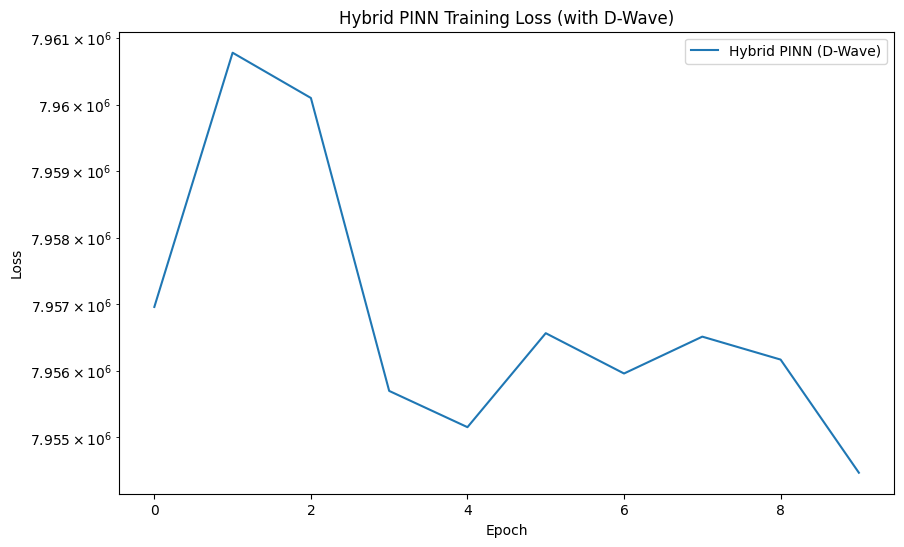

In [ ]:
model = HybridPINN(binary_layer_size=8)
loss_hist = train_hybrid_model(model, X_train, epochs=10, lr=0.01, quantum_every=2)

# Evaluate
with torch.no_grad():
    x_eval = torch.tensor(X_train[:,0:1], dtype=torch.float32)
    t_eval = torch.tensor(X_train[:,1:2], dtype=torch.float32)
    c_true = analytical_solution(x_eval.numpy().flatten(), t_eval.numpy().flatten())
    c_hybrid = model(x_eval, t_eval).numpy().flatten()
    mse_hybrid = np.mean((c_hybrid - c_true)**2)
    print(f"MSE (Hybrid D-Wave): {mse_hybrid:.2e}")

plt.figure(figsize=(10,6))
plt.semilogy(loss_hist, label="Hybrid PINN (D-Wave)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Hybrid PINN Training Loss (with D-Wave)")
plt.show()
